Part 1: DQN

DONE:
-implement get action
-implement sample batch
-implement dqn

Part 2: PPO

DONE: 
-Implement calculate return method
-Implement get action method
-implement PPO learning algorithm **(turned in 30 min late)**


Part 3: Cartpole

DONE: 
Train DQN
Train PPO

-DQN image:

![alt text]( https://thleats-bucket.s3.us-east-2.amazonaws.com/DQN.JPG)



### DQN

Episodes: 98 Reward: 10.0:  20%|█▉        | 99/500 [00:02<00:18, 22.22it/s]

updated


Episodes: 146 Reward: 13.0:  29%|██▉       | 147/500 [00:04<00:18, 19.33it/s]

updated


Episodes: 208 Reward: 10.0:  42%|████▏     | 209/500 [00:07<00:12, 23.11it/s]

updated


Episodes: 269 Reward: 11.0:  54%|█████▍    | 270/500 [00:10<00:12, 18.35it/s]

updated


Episodes: 310 Reward: 10.0:  62%|██████▏   | 311/500 [00:14<00:24,  7.85it/s]

updated


Episodes: 325 Reward: 29.0:  65%|██████▌   | 326/500 [00:17<00:36,  4.74it/s] 

updated


Episodes: 336 Reward: 16.0:  67%|██████▋   | 337/500 [00:20<01:05,  2.48it/s] 

updated


Episodes: 344 Reward: 120.0:  69%|██████▉   | 345/500 [00:24<01:16,  2.01it/s]

updated


Episodes: 352 Reward: 119.0:  71%|███████   | 353/500 [00:28<01:06,  2.20it/s]

updated


Episodes: 360 Reward: 150.0:  72%|███████▏  | 361/500 [00:32<01:19,  1.74it/s]

updated


Episodes: 366 Reward: 154.0:  73%|███████▎  | 367/500 [00:36<01:22,  1.61it/s]

updated


Episodes: 372 Reward: 116.0:  75%|███████▍  | 373/500 [00:41<01:31,  1.39it/s]

updated


Episodes: 377 Reward: 196.0:  76%|███████▌  | 378/500 [00:45<01:49,  1.12it/s]

updated


Episodes: 382 Reward: 181.0:  77%|███████▋  | 383/500 [00:50<01:43,  1.13it/s]

updated


Episodes: 387 Reward: 200.0:  78%|███████▊  | 388/500 [00:55<01:49,  1.03it/s]

updated


Episodes: 392 Reward: 200.0:  79%|███████▊  | 393/500 [01:00<01:49,  1.02s/it]

updated


Episodes: 399 Reward: 200.0:  80%|████████  | 400/500 [01:06<01:42,  1.02s/it]

updated


Episodes: 404 Reward: 200.0:  81%|████████  | 405/500 [01:12<01:48,  1.14s/it]

updated


Episodes: 409 Reward: 200.0:  82%|████████▏ | 410/500 [01:18<01:45,  1.18s/it]

updated


Episodes: 414 Reward: 200.0:  83%|████████▎ | 415/500 [01:24<01:42,  1.20s/it]

updated


Episodes: 419 Reward: 200.0:  84%|████████▍ | 420/500 [01:30<01:40,  1.26s/it]

updated


Episodes: 424 Reward: 200.0:  85%|████████▌ | 425/500 [01:37<01:37,  1.29s/it]

updated


Episodes: 428 Reward: 200.0:  86%|████████▌ | 429/500 [01:42<01:32,  1.31s/it]

updated


Episodes: 434 Reward: 200.0:  87%|████████▋ | 435/500 [01:50<01:28,  1.36s/it]

updated


Episodes: 438 Reward: 200.0:  88%|████████▊ | 439/500 [01:56<01:25,  1.40s/it]

updated


Episodes: 444 Reward: 200.0:  89%|████████▉ | 445/500 [02:04<01:19,  1.45s/it]

updated


Episodes: 449 Reward: 196.0:  90%|█████████ | 450/500 [02:12<01:13,  1.46s/it]

updated


Episodes: 454 Reward: 200.0:  91%|█████████ | 455/500 [02:19<01:06,  1.48s/it]

updated


Episodes: 459 Reward: 194.0:  92%|█████████▏| 460/500 [02:26<01:00,  1.52s/it]

updated


Episodes: 464 Reward: 198.0:  93%|█████████▎| 465/500 [02:34<00:54,  1.57s/it]

updated


Episodes: 469 Reward: 200.0:  94%|█████████▍| 470/500 [02:43<00:49,  1.65s/it]

updated


Episodes: 474 Reward: 198.0:  95%|█████████▌| 475/500 [02:51<00:41,  1.66s/it]

updated


Episodes: 480 Reward: 200.0:  96%|█████████▌| 481/500 [03:00<00:30,  1.58s/it]

updated


Episodes: 485 Reward: 194.0:  97%|█████████▋| 486/500 [03:09<00:23,  1.66s/it]

updated


Episodes: 490 Reward: 200.0:  98%|█████████▊| 491/500 [03:17<00:15,  1.69s/it]

updated


Episodes: 496 Reward: 200.0:  99%|█████████▉| 497/500 [03:27<00:05,  1.68s/it]

updated


Episodes: 499 Reward: 158.0: 100%|██████████| 500/500 [03:32<00:00,  1.59s/it]

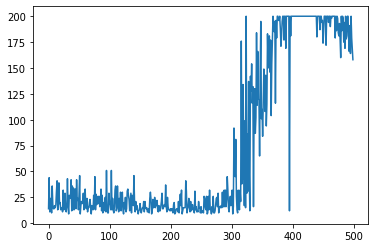

In [0]:


! pip3 install gym
! pip3 install torch

import gym
import torch
import torch.nn as nn
from itertools import chain
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pdb


# Q-Value Network
class QNetwork(nn.Module):
  def __init__(self, state_size, action_size):
    super().__init__()
    hidden_size = 8
    
    self.net = nn.Sequential(nn.Linear(state_size, hidden_size),
                             nn.ReLU(),
                             nn.Linear(hidden_size, hidden_size),
                             nn.ReLU(),
                             nn.Linear(hidden_size, hidden_size),
                             nn.ReLU(),
                             nn.Linear(hidden_size, action_size))  
    
  def forward(self, x):
    """Estimate q-values given state

      Args:
          state (tensor): current state, size (batch x state_size)

      Returns:
          q-values (tensor): estimated q-values, size (batch x action_size)
    """
    return self.net(x)



def get_action_dqn(network, state, epsilon, epsilon_decay):

  rand = random.random()
  if rand < epsilon:
    return random.randint(0,1),epsilon*epsilon_decay
  else:
    state = np.float32(state)
    test = torch.tensor(state).cuda()
    return torch.argmax(network(test)),epsilon*epsilon_decay


def prepare_batch(memory, batch_size):
  """Randomly sample batch from memory
     Prepare cuda tensors
  
    Args:
        memory (list): state, action, next_state, reward, done tuples
        batch_size (int): amount of memory to sample into a batch

    Returns:
        state (tensor): float cuda tensor of size (batch_size x state_size()
        action (tensor): long tensor of size (batch_size)
        next_state (tensor): float cuda tensor of size (batch_size x state_size)
        reward (tensor): float cuda tensor of size (batch_size)
        done (tensor): float cuda tensor of size (batch_size)
  """
  
  slices = np.random.randint(0,len(memory),batch_size)
  memory_array=np.asarray(memory)
  test=memory_array[slices]
  #pdb.set_trace()
  state=torch.tensor(np.float32(np.vstack(test[:,0])))
  action=torch.tensor(np.float32(np.vstack(test[:,1])))
  next_state=torch.tensor(np.float32(np.vstack(test[:,2])))
  reward=torch.tensor(np.float32(np.vstack(test[:,3])))
  done=torch.tensor(np.float32(np.vstack(test[:,4])))
  
  return state,action,next_state,reward,done
  
  
def learn_dqn(batch, optim, q_network, target_network, gamma, global_step, target_update):
  """Update Q-Network according to DQN Loss function
     Update Target Network every target_update global steps

    Args:
        batch (tuple): tuple of state, action, next_state, reward, and done tensors
        optim (Adam): Q-Network optimizer
        q_network (QNetwork): Q-Network
        target_network (QNetwork): Target Q-Network
        gamma (float): discount factor
        global_step (int): total steps taken in environment
        target_update (int): frequency of target network update
  """
  
  state,action,next_state,reward,done=batch
  #pdb.set_trace()
  batch_size=state.size(0)
  #pdb.set_trace()
  action_oh=torch.FloatTensor(batch_size,2)*0#create a batch size by 2 matrix
  action_out=action_oh.scatter(1,action.long(),1)#create a onehot matrix from which actions are tkane
  output=q_network(state.cuda())
  actions_gathered=torch.gather(output,1,action.long().cuda())
  #pdb.set_trace()
  out = torch.max(target_network(next_state.cuda()),1)
  #pdb.set_trace()
  weee = ((actions_gathered.t()-(reward.t().cuda() + gamma * out[0] *(1-done.t().cuda())))**2)
  loss = torch.sum(weee.squeeze(0))/batch_size
  #pdb.set_trace()
  optim.zero_grad()
  loss.backward()
  optim.step()
  #print(target_update % global_step)
  if global_step % target_update==0:
    target_network.load_state_dict(q_network.state_dict())
    #pdb.set_trace()
    print('updated')
  return(loss)

def dqn_main():
  # Hyper parameters
  lr = 1e-3
  epochs = 500
  start_training = 1000
  gamma = 0.99
  batch_size = 32
  epsilon = 1
  epsilon_decay = .9999
  target_update = 1000
  learn_frequency = 2

  # Init environment
  state_size = 4
  action_size = 2
  env = gym.make('CartPole-v1', )

  # Init networks
  q_network = QNetwork(state_size, action_size).cuda()
  target_network = QNetwork(state_size, action_size).cuda()
  target_network.load_state_dict(q_network.state_dict())

  # Init optimizer
  optim = torch.optim.Adam(q_network.parameters(), lr=lr)

  # Init replay buffer
  memory = []

  # Begin main loop
  results_dqn = []
  global_step = 0
  loop = tqdm(total=epochs, position=0, leave=False)
  for epoch in range(epochs):

    # Reset environment
    state = env.reset()
    done = False
    cum_reward = 0  # Track cumulative reward per episode

    # Begin episode
    while not done and cum_reward < 200:  # End after 200 steps 
      # Select e-greedy action
      action, epsilon = get_action_dqn(q_network, state, epsilon, epsilon_decay)
      # Take step
      try:
        next_state, reward, done, _ = env.step(action)
      except:
        #pdb.set_trace()
        next_state, reward, done, _ = env.step(action.cpu().item())
      # env.render()

      # Store step in replay buffer
      try:
        memory.append((state, action.cpu().item(), next_state, reward, done))
      except:
        memory.append((state, action, next_state, reward, done))

      cum_reward += reward
      global_step += 1  # Increment total steps
      state = next_state  # Set current state

      # If time to train
      if global_step > start_training and global_step % learn_frequency == 0:

        # Sample batch
        batch = prepare_batch(memory, batch_size)
        #pdb.set_trace()
        # Train
        learn_dqn(batch, optim, q_network, target_network, gamma, global_step, target_update)

    # Print results at end of episode
    results_dqn.append(cum_reward)
    loop.update(1)
    loop.set_description('Episodes: {} Reward: {}'.format(epoch, cum_reward))
  
  return results_dqn

results_dqn = dqn_main()

plt.plot(results_dqn)
plt.show()